In [1]:
# Import necessary libraries
import pandas as pd  # Used for data manipulation and analysis
import numpy as np   # Used for numerical operations
import seaborn as sns # Used for data visualization
import matplotlib.pyplot as plt # Used for creating plots
from sklearn.model_selection import train_test_split # Used to split data into training and testing sets
from sklearn.ensemble import IsolationForest # Used for anomaly detection
from sklearn.metrics import accuracy_score, classification_report # Used to evaluate the model performance
from sklearn.preprocessing import StandardScaler # Used for standardizing the data

In [10]:
credit_data = pd.read_csv('data/creditcard.csv', nrows=40000) # Reads the credit card data, limiting it to 40000 rows for efficiency.
# Data Source https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
credit_data.head() # Display the first few rows of the dataframe to see the data
scaler = StandardScaler().fit_transform(credit_data.loc[:,credit_data.columns!='Class']) # Scales all columns except 'Class' using StandardScaler, preparing data for the model.
scaled_data = scaler[0:40000]  # Extracts the scaled data
df = pd.DataFrame(data=scaled_data)  # Converts the scaled data back to a Pandas DataFrame, which is required by the IsolationForest model

# Separate features and target variable
X = credit_data.drop(columns=['Class']) # Stores all features into 'X' variable
y = credit_data['Class'] # Stores the target variable into 'y' variable


In [11]:
# Determine the fraction of outliers
outlier_fraction = len(credit_data[credit_data['Class']==1])/float(len(credit_data[credit_data['Class']==0]))
# Create and fit the Isolation Forest model
model =  IsolationForest(n_estimators=100, contamination=outlier_fraction, random_state=42)
model.fit(df)

IsolationForest(contamination=0.0026067776218167233, random_state=42)

In [12]:
# Predict outliers
scores_prediction = model.decision_function(df) # Scores assigned to each instance (lower = more likely to be an outlier)
y_pred = model.predict(df) # Predicts whether each transaction is an outlier (-1) or not (1)
y_pred[y_pred == 1] = 0 # Converts the output to match the original labels (0: normal, 1: anomaly)
y_pred[y_pred == -1] = 1 # Converts the output to match the original labels (0: normal, 1: anomaly)
# Print the accuracy in separating outliers or anomalies
print("Accuracy in finding anomaly:",accuracy_score(y,y_pred))

Accuracy in finding anomaly: 0.997175


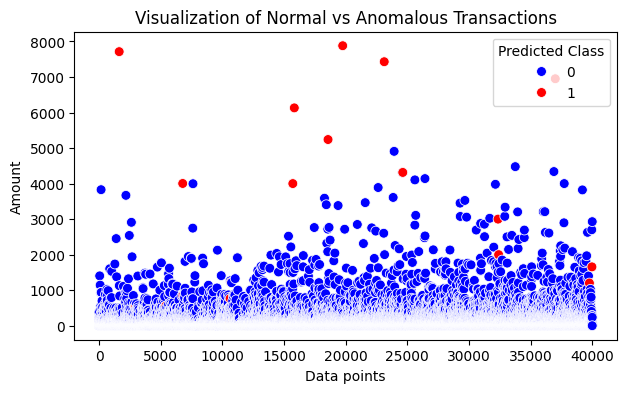

In [13]:
# Selecting the feature for y-axis
y_feature = credit_data['Amount']    # change the feature name to visualize another

# Adding the predicted labels to the original dataset
credit_data['predicted_class'] = y_pred

# Plotting the graph
plt.figure(figsize=(7, 4)) # Sets up figure size
sns.scatterplot(x=credit_data.index, y=y_feature, hue=credit_data['predicted_class'], palette={0: 'blue', 1: 'red'}, s=50) # creates a scatter plot of the predicted class.
plt.title('Visualization of Normal vs Anomalous Transactions') # Sets the title of the plot
plt.xlabel('Data points') # Sets the x label of the plot
plt.ylabel(y_feature.name)  # Sets the y label of the plot
plt.legend(title='Predicted Class', loc='best') # Sets the legend of the plot
plt.show() # Displays the plot